# Holidays

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [3]:
type_dict = {
    "type": "string",
    "locale": "string",
    "locale_name": "string",
    "description": "string",
    "transferred": "string"
}

train_df = pd.read_csv("./kaggle/input/store-sales-time-series-forecasting/train.csv", index_col = "date", usecols=["date", "sales"], dtype = {"date": "string", "sales": float})
test_df = pd.read_csv("./kaggle/input/store-sales-time-series-forecasting/test.csv", index_col = "date", usecols=["date"], dtype = {"date": "string"})
df = pd.read_csv("./kaggle/input/store-sales-time-series-forecasting/holidays_events.csv", index_col = "date", dtype= type_dict)
df

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...
2017-12-22,Additional,National,Ecuador,Navidad-3,False
2017-12-23,Additional,National,Ecuador,Navidad-2,False
2017-12-24,Additional,National,Ecuador,Navidad-1,False


In [4]:
train_test_df = pd.concat([train_df, test_df], axis=0)
sales_df = train_test_df.groupby("date").sales.sum()
sales_df

date
2013-01-01      2511.618999
2013-01-02    496092.417944
2013-01-03    361461.231124
2013-01-04    354459.677093
2013-01-05    477350.121229
                  ...      
2017-08-27         0.000000
2017-08-28         0.000000
2017-08-29         0.000000
2017-08-30         0.000000
2017-08-31         0.000000
Name: sales, Length: 1700, dtype: float64

In [5]:
holiday_sales_df = df.join(sales_df, on="date", how="right")
holiday_sales_df.set_index("date", inplace=True)
holiday_sales_df

,type,locale,locale_name,description,transferred,sales
date,,,,,,
2013-01-01,Holiday,National,Ecuador,Primer dia del ano,False,2511.618999
2013-01-02,<NA>,<NA>,<NA>,<NA>,<NA>,496092.417944
2013-01-03,<NA>,<NA>,<NA>,<NA>,<NA>,361461.231124
2013-01-04,<NA>,<NA>,<NA>,<NA>,<NA>,354459.677093
2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False,477350.121229
...,...,...,...,...,...,...
2017-08-27,<NA>,<NA>,<NA>,<NA>,<NA>,0.000000
2017-08-28,<NA>,<NA>,<NA>,<NA>,<NA>,0.000000
2017-08-29,<NA>,<NA>,<NA>,<NA>,<NA>,0.000000


In [6]:
holiday_sales_df["type"].fillna("Work Day", inplace=True)
holiday_sales_df["locale"].fillna("National", inplace=True)
holiday_sales_df["locale_name"].fillna("Ecuador", inplace=True)
holiday_sales_df["description"].fillna("Work Day", inplace=True)
holiday_sales_df["transferred"].fillna("False", inplace=True)

In [7]:
holiday_sales_df["type"] = holiday_sales_df.apply(lambda x: x["type"] if x["transferred"]=="False" else "Work Day", axis=1)
holiday_sales_df[holiday_sales_df["transferred"]=="True"]

,type,locale,locale_name,description,transferred,sales
date,,,,,,
2013-10-09,Work Day,National,Ecuador,Independencia de Guayaquil,True,322529.418957
2014-10-09,Work Day,National,Ecuador,Independencia de Guayaquil,True,510519.923104
2016-05-24,Work Day,National,Ecuador,Batalla de Pichincha,True,606377.205216
2016-07-25,Work Day,Local,Guayaquil,Fundacion de Guayaquil,True,697383.602092
2016-08-10,Work Day,National,Ecuador,Primer Grito de Independencia,True,658457.436112
2017-01-01,Work Day,National,Ecuador,Primer dia del ano,True,12082.500997
2017-04-12,Work Day,Local,Cuenca,Fundacion de Cuenca,True,791762.312883
2017-05-24,Work Day,National,Ecuador,Batalla de Pichincha,True,746303.627126
2017-08-10,Work Day,National,Ecuador,Primer Grito de Independencia,True,651386.911970


In [8]:
holiday_sales_df.drop(["transferred", "description", "locale_name"], axis=1, inplace=True)
holiday_sales_df

,type,locale,sales
date,,,
2013-01-01,Holiday,National,2511.618999
2013-01-02,Work Day,National,496092.417944
2013-01-03,Work Day,National,361461.231124
2013-01-04,Work Day,National,354459.677093
2013-01-05,Work Day,National,477350.121229
...,...,...,...
2017-08-27,Work Day,National,0.000000
2017-08-28,Work Day,National,0.000000
2017-08-29,Work Day,National,0.000000


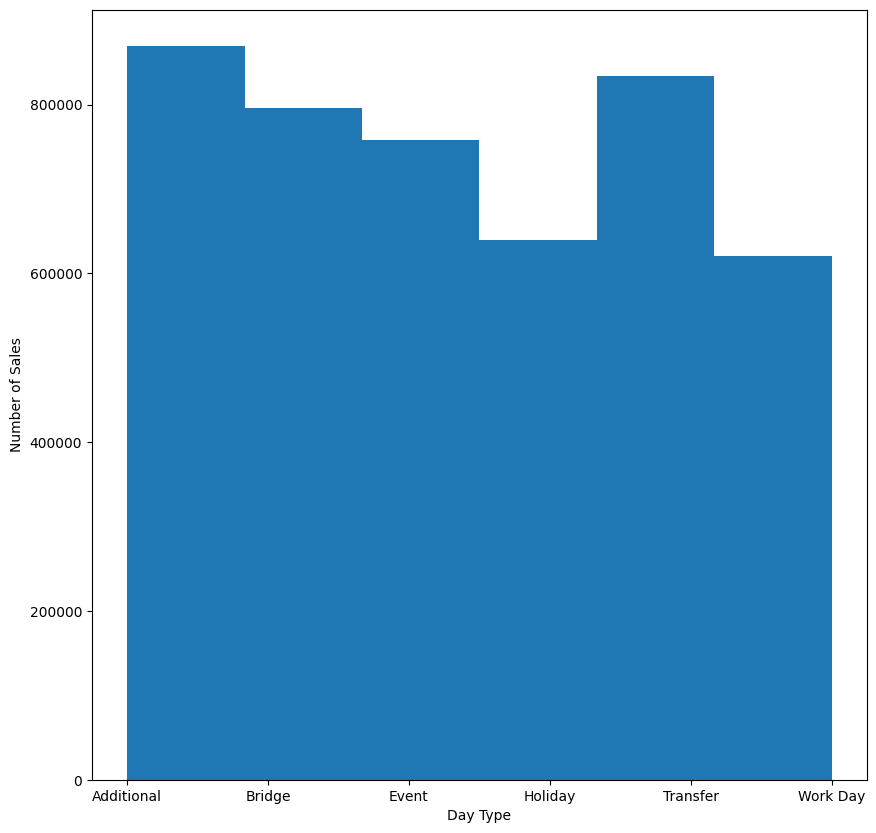

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sales_type_df = holiday_sales_df.groupby("type").sales.mean()
ax.hist(weights = sales_type_df, x =sales_type_df.index, bins=6)
ax.set(xlabel="Day Type", ylabel="Number of Sales")
plt.show()

In [10]:
holiday_df = holiday_sales_df.drop("sales", axis=1)
holiday_df

,type,locale
date,,
2013-01-01,Holiday,National
2013-01-02,Work Day,National
2013-01-03,Work Day,National
2013-01-04,Work Day,National
2013-01-05,Work Day,National
...,...,...
2017-08-27,Work Day,National
2017-08-28,Work Day,National
2017-08-29,Work Day,National


In [11]:
df_to_concat = [holiday_df]
temp = pd.get_dummies(holiday_df["locale"])
for name in temp.columns:
    temp.rename({name: name + "_Holiday"}, axis=1, inplace=True)
df_to_concat.append(temp)
temp = pd.get_dummies(holiday_df["type"])
df_to_concat.append(temp)
concat_holiday_df = pd.concat(df_to_concat, axis=1)
concat_holiday_df.drop(["locale", "type"], axis=1, inplace=True)
concat_holiday_df

,Local_Holiday,National_Holiday,Regional_Holiday,Additional,Bridge,Event,Holiday,Transfer,Work Day
date,,,,,,,,,
2013-01-01,0,1,0,0,0,0,1,0,0
2013-01-02,0,1,0,0,0,0,0,0,1
2013-01-03,0,1,0,0,0,0,0,0,1
2013-01-04,0,1,0,0,0,0,0,0,1
2013-01-05,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
2017-08-27,0,1,0,0,0,0,0,0,1
2017-08-28,0,1,0,0,0,0,0,0,1
2017-08-29,0,1,0,0,0,0,0,0,1


In [12]:
concat_holiday_df.to_csv("./kaggle/input/store-sales-time-series-forecasting/holidays_events_clean.csv")